In [1]:
import pandas as pd
data = pd.read_csv("/kaggle/input/song-data/songs.csv", encoding='latin-1',engine='python')
# Preview the first & last 5 lines of the loaded data
data

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,89,67,8,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,93,75,52,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,84,76,29,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,92,70,8,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,84,64,9,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,66,61,20,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,79,75,7,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,76,53,9,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,79,60,42,1,7,69


In [2]:
data.describe()

,id,year,energy,danceability,liveness,acousticness,speechiness,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,70.504146,64.379768,17.774461,14.326700,8.358209,66.520730
std,174.215384,2.607057,16.310664,13.378718,13.102543,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,61.000000,57.000000,9.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,74.000000,66.000000,12.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,82.000000,73.000000,24.000000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,98.000000,97.000000,74.000000,99.000000,48.000000,99.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'pop'}>, <Axes: >]], dtype=object)

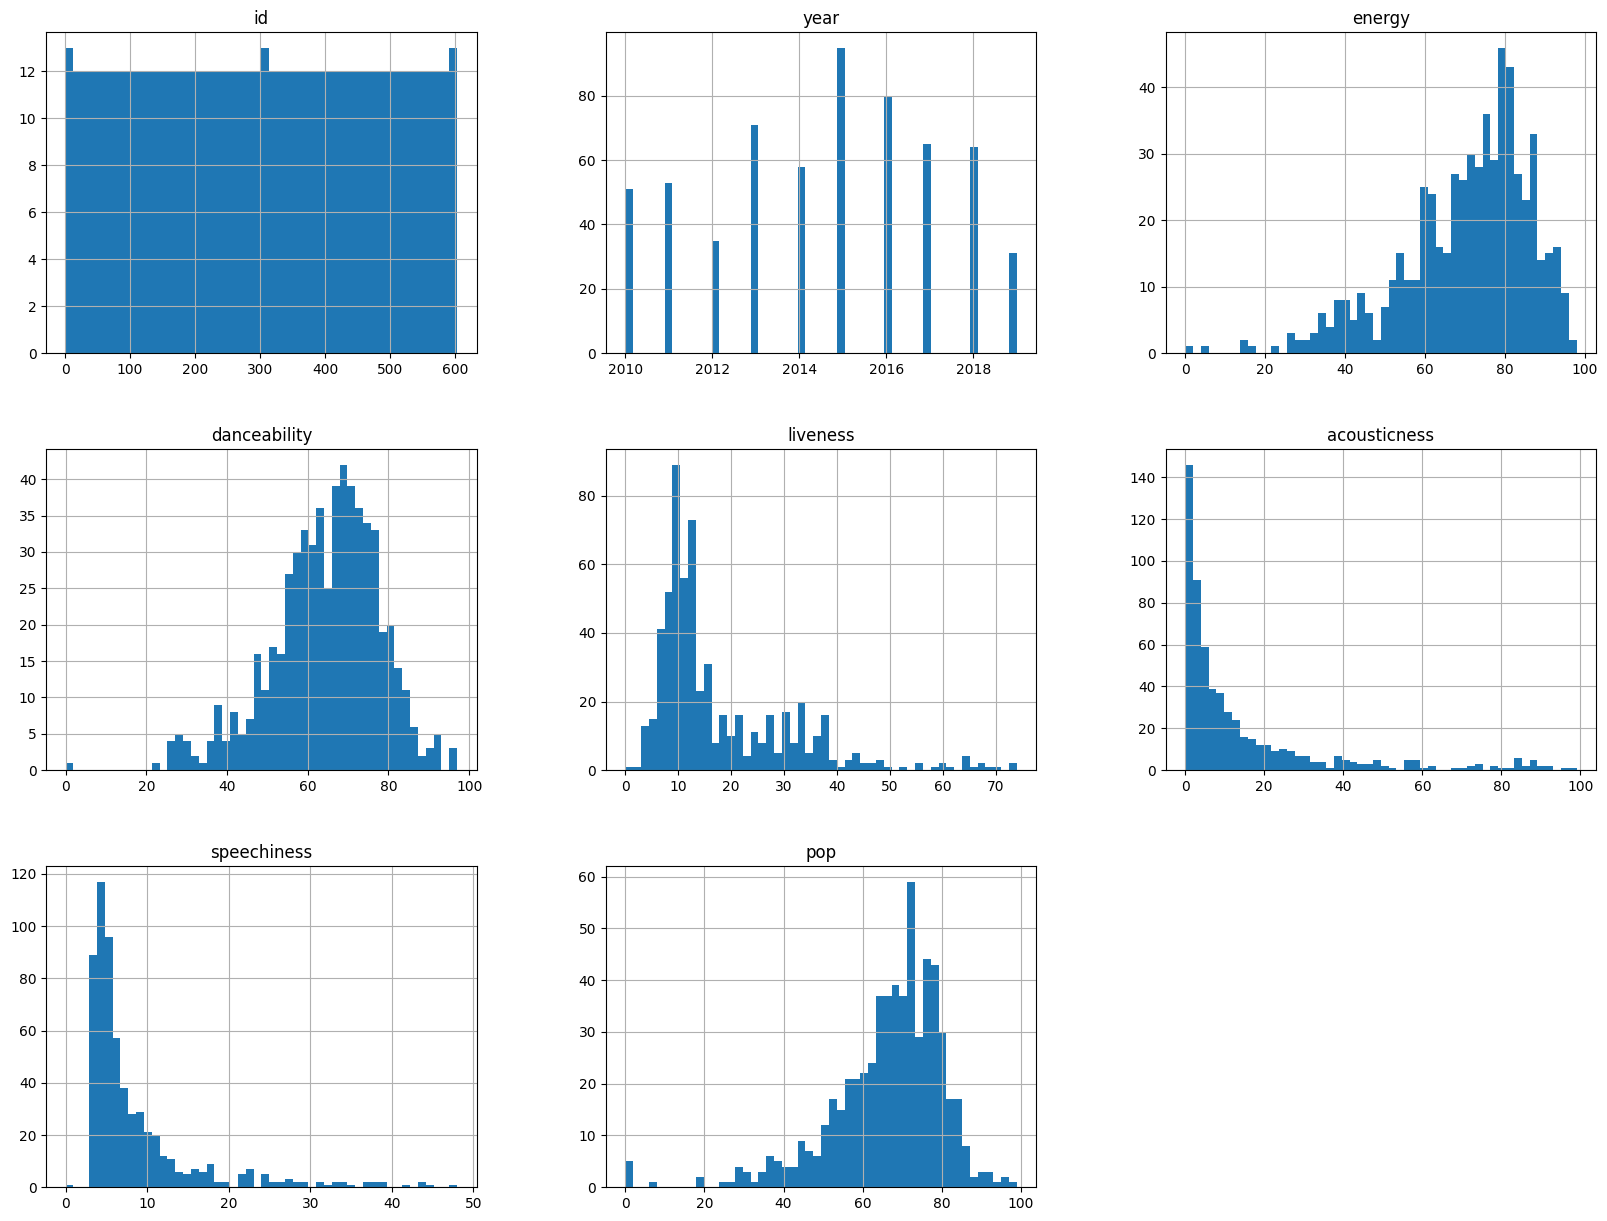

In [3]:
from matplotlib import pyplot as plt
data.hist(bins=50,figsize=(20,15))

In [4]:
# remove song names, artist and id before clustering
data_features = data.copy()
data_features = data_features.drop(['title','artist','id','year','top genre'],axis=1)
data_features

,energy,danceability,liveness,acousticness,speechiness,pop
0,89,67,8,19,4,83
1,93,75,52,24,23,82
2,84,76,29,10,14,80
3,92,70,8,0,4,79
4,84,64,9,2,4,78
...,...,...,...,...,...,...
598,66,61,20,1,3,75
599,79,75,7,21,12,75
600,76,53,9,7,34,70
601,79,60,42,1,7,69


In [5]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init='auto')
    km = km.fit(data_features)
    Sum_of_squared_distances.append(km.inertia_)

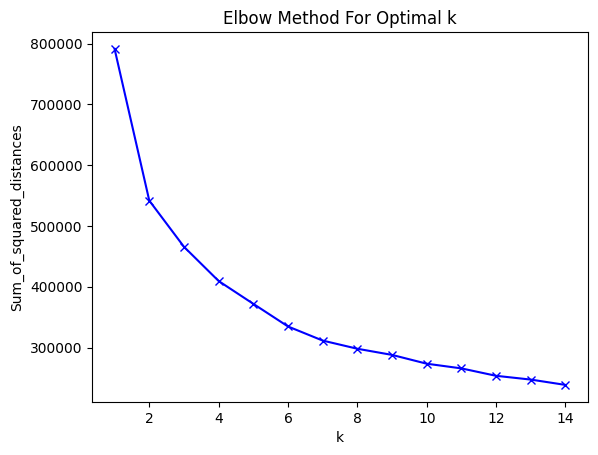

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [7]:
kmeans = KMeans(n_clusters=6, n_init='auto')
kmeans.fit(data_features)

KMeans(n_clusters=6, n_init='auto')

In [8]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(data_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_features)


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


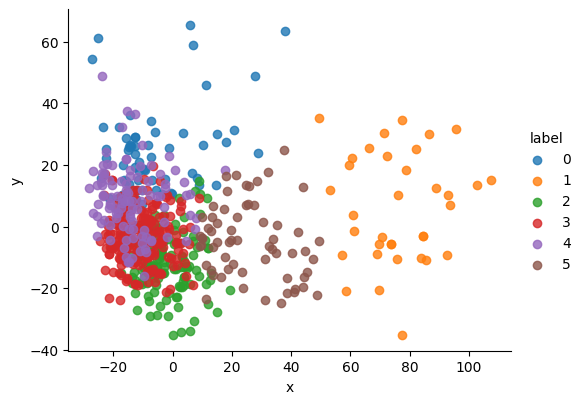

In [9]:
import seaborn as sns
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label',
                   fit_reg=False, legend=True, facet_kws={'legend_out': True})
cluster.fig.set_size_inches(6, 4)

In [10]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(data_features)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


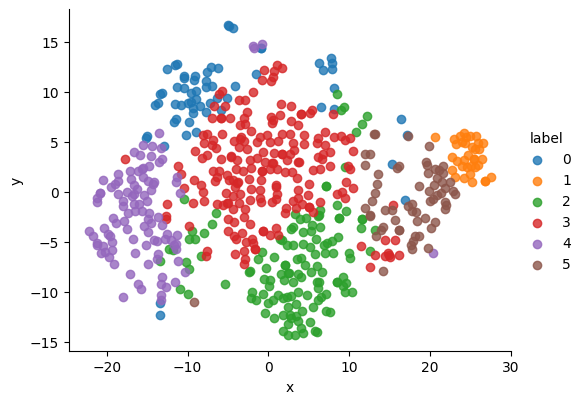

In [11]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', fit_reg=False, legend=True, facet_kws={'legend_out': True})
cluster.fig.set_size_inches(6, 4)

In [12]:
pca.explained_variance_ratio_

array([0.43798608, 0.17454666])

In [13]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=data_features.columns,index = ['PC-1','PC-2']))

        energy  danceability  liveness  acousticness  speechiness       pop
PC-1 -0.538315     -0.183234 -0.106366      0.814941    -0.015063  0.031170
PC-2  0.150331     -0.408807  0.324991      0.082877     0.066276 -0.832704


In [14]:
data['label'] = y_kmeans

# shuffle dataset
data = data.sample(frac=1) #frac=1 samples 100% of the data
data['label'].value_counts()

label
3    206
2    133
4    103
0     63
5     63
1     35
Name: count, dtype: int64

In [15]:
data[data['label'] == 0].tail(10) #returns the last N rows of filtered DataFrame

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
203,204,People Like Us,Kelly Clarkson,dance pop,2013,79,60,36,4,4,45,0
569,570,...Ready For It? - BloodPop® Remix,Taylor Swift,pop,2018,84,58,10,13,22,52,0
357,358,Legendary Lovers,Katy Perry,dance pop,2015,84,62,8,2,8,41,0
504,505,Water Under the Bridge,Adele,british soul,2017,84,60,11,2,7,49,0
350,351,"Celebrate (From the Original Motion Picture ""P...",Pitbull,dance pop,2015,85,68,6,1,6,50,0
362,363,L.A.LOVE (la la),Fergie,dance pop,2015,39,48,26,2,9,0,0
348,349,Don't Be so Hard on Yourself,Jess Glynne,dance pop,2015,82,57,16,6,3,52,0
262,263,You're Mine (Eternal),Mariah Carey,dance pop,2014,58,63,38,28,7,38,0
429,430,Champagne Problems,Nick Jonas,dance pop,2016,78,73,9,0,13,50,0
345,346,Bloodstream,Ed Sheeran,pop,2015,59,48,6,20,5,52,0


In [16]:
data['top genre'][data['label'] == 0].value_counts()

top genre
dance pop         44
atl hip hop        3
pop                3
british soul       2
latin              1
alaska indie       1
big room           1
hip pop            1
hollywood          1
neo mellow         1
canadian latin     1
barbadian pop      1
moroccan pop       1
boy band           1
permanent wave     1
Name: count, dtype: int64

In [17]:
data[data['label'] == 1].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
271,272,Love Yourself,Justin Bieber,canadian pop,2015,38,61,28,84,44,83,1
249,250,Say Something,A Great Big World,neo mellow,2014,15,45,9,87,3,61,1
528,529,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,pop,2018,30,59,12,78,3,78,1
573,574,Lose You To Love Me,Selena Gomez,dance pop,2019,34,51,21,58,4,97,1
44,45,You Lost Me,Christina Aguilera,dance pop,2010,39,23,14,85,4,56,1
364,365,Love Yourself,Justin Bieber,canadian pop,2016,38,61,28,84,44,83,1
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,37,48,12,74,3,76,1
436,437,Beautiful Birds (feat. Birdy),Passenger,folk-pop,2016,17,39,11,91,3,36,1
560,561,This Town,Niall Horan,dance pop,2018,41,68,12,70,3,64,1
276,277,FourFiveSeconds,Rihanna,barbadian pop,2015,27,58,13,88,5,80,1


In [18]:
data['top genre'][data['label'] == 0].value_counts()

top genre
dance pop         44
atl hip hop        3
pop                3
british soul       2
latin              1
alaska indie       1
big room           1
hip pop            1
hollywood          1
neo mellow         1
canadian latin     1
barbadian pop      1
moroccan pop       1
boy band           1
permanent wave     1
Name: count, dtype: int64

In [19]:
data[data['label'] == 2].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
541,542,Say Something,Justin Timberlake,dance pop,2018,63,71,8,10,8,74,2
566,567,Ferrari,Bebe Rexha,dance pop,2018,48,58,10,2,3,57,2
535,536,Sick Boy,The Chainsmokers,electropop,2018,58,66,12,11,5,76,2
383,384,Shout Out to My Ex,Little Mix,dance pop,2016,75,77,11,2,9,77,2
523,524,Sorry Not Sorry,Demi Lovato,dance pop,2018,64,71,26,2,23,81,2
158,159,"Hold On, We're Going Home",Drake,canadian hip hop,2013,41,77,7,0,10,73,2
153,154,Die Young,Kesha,dance pop,2013,70,71,22,0,5,75,2
216,217,Dark Horse,Katy Perry,dance pop,2014,59,65,17,0,5,78,2
109,110,I Knew You Were Trouble.,Taylor Swift,pop,2012,47,62,3,0,4,77,2
230,231,Fancy,Iggy Azalea,australian hip hop,2014,72,91,5,9,7,70,2


In [20]:
data['top genre'][data['label'] == 2].value_counts()

top genre
dance pop                    74
pop                          17
electropop                    6
canadian pop                  5
edm                           4
canadian contemporary r&b     3
barbadian pop                 3
canadian hip hop              2
downtempo                     2
art pop                       2
boy band                      2
hip hop                       2
hip pop                       1
escape room                   1
electro                       1
latin                         1
british soul                  1
big room                      1
australian pop                1
belgian edm                   1
alternative r&b               1
tropical house                1
australian hip hop            1
Name: count, dtype: int64

In [21]:
data[data['label'] == 3].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
413,414,Cheap Thrills,Sia,australian dance,2016,80,59,8,6,22,64,3
108,109,What Makes You Beautiful,One Direction,boy band,2012,79,73,6,1,7,78,3
385,386,Confident,Demi Lovato,dance pop,2016,75,59,9,0,7,75,3
81,82,You And I,Lady Gaga,dance pop,2011,70,52,9,9,5,64,3
375,376,Scars To Your Beautiful,Alessia Cara,canadian contemporary r&b,2016,74,57,11,3,13,79,3
72,73,What's My Name?,Rihanna,barbadian pop,2011,79,69,8,23,7,69,3
7,8,Secrets,OneRepublic,dance pop,2010,76,52,12,7,4,77,3
525,526,These Days,Rudimental,dance pop,2018,81,65,17,19,5,80,3
3,4,Bad Romance,Lady Gaga,dance pop,2010,92,70,8,0,4,79,3
406,407,PILLOWTALK,ZAYN,dance pop,2016,70,59,9,10,5,66,3


In [22]:
data['top genre'][data['label'] == 3].value_counts()

top genre
dance pop                    112
pop                           16
canadian pop                  15
boy band                       7
barbadian pop                  6
big room                       6
australian dance               5
complextro                     4
electropop                     3
canadian contemporary r&b      3
baroque pop                    2
british soul                   2
hip pop                        2
neo mellow                     2
latin                          2
permanent wave                 2
electronic trap                2
colombian pop                  2
art pop                        2
brostep                        1
contemporary country           1
australian pop                 1
celtic rock                    1
house                          1
atl hip hop                    1
candy pop                      1
acoustic pop                   1
electro                        1
belgian edm                    1
electro house                  1


In [23]:
data[data['label'] == 4].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
86,87,Marry The Night,Lady Gaga,dance pop,2011,88,61,46,0,6,61,4
15,16,OMG (feat. will.i.am),Usher,atl hip hop,2010,75,78,36,20,3,72,4
495,496,We Don't Talk Anymore - DROELOE Remix,Charlie Puth,dance pop,2017,82,70,45,49,22,59,4
12,13,Cooler Than Me - Single Mix,Mike Posner,dance pop,2010,82,77,70,18,5,73,4
338,339,Prayer in C - Robin Schulz Radio Edit,Lilly Wood and The Prick,french indie pop,2015,89,76,62,2,3,58,4
38,39,Rock That Body,The Black Eyed Peas,dance pop,2010,91,72,43,2,10,59,4
229,230,She Looks So Perfect,5 Seconds of Summer,boy band,2014,95,49,33,0,13,71,4
310,311,Runnin' (Lose It All),Naughty Boy,tropical house,2015,85,32,48,1,8,69,4
581,582,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,89,67,74,30,6,90,4
306,307,Only Love Can Hurt Like This,Paloma Faith,british soul,2015,89,57,33,10,8,69,4


In [24]:
data['top genre'][data['label'] == 4].value_counts()

top genre
dance pop           60
pop                 10
canadian pop         6
boy band             3
australian pop       3
barbadian pop        3
tropical house       2
electropop           2
indie pop            2
escape room          1
french indie pop     1
atl hip hop          1
metropopolis         1
detroit hip hop      1
edm                  1
hip hop              1
candy pop            1
colombian pop        1
chicago rap          1
big room             1
british soul         1
Name: count, dtype: int64

In [25]:
data[data['label'] == 5].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
74,75,Without You (feat. Usher),David Guetta,dance pop,2011,61,61,16,23,3,68,5
341,342,"Feel The Light - From The ""Home"" Soundtrack",Jennifer Lopez,dance pop,2015,60,47,9,33,5,55,5
278,279,"Earned It (Fifty Shades Of Grey) - From The ""F...",The Weeknd,canadian contemporary r&b,2015,38,66,10,39,3,79,5
456,457,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,dance pop,2017,76,72,18,41,5,78,5
578,579,Trampoline (with ZAYN),SHAED,electropop,2019,46,62,14,56,3,92,5
467,468,Slide (feat. Frank Ocean & Migos),Calvin Harris,dance pop,2017,80,74,25,50,5,75,5
148,149,Wrecking Ball,Miley Cyrus,dance pop,2013,42,53,11,41,3,77,5
372,373,7 Years,Lukas Graham,danish pop,2016,47,77,39,29,5,80,5
232,233,Gorilla,Bruno Mars,pop,2014,54,72,10,45,4,68,5
402,403,Cool Girl,Tove Lo,dance pop,2016,69,67,8,31,11,69,5


In [26]:
data['top genre'][data['label'] == 5].value_counts()

top genre
dance pop                    29
pop                          10
canadian contemporary r&b     3
canadian pop                  3
british soul                  2
art pop                       2
electropop                    2
complextro                    2
brostep                       1
hip pop                       1
big room                      1
neo mellow                    1
hip hop                       1
boy band                      1
folk-pop                      1
barbadian pop                 1
irish singer-songwriter       1
danish pop                    1
Name: count, dtype: int64

In [27]:
data[data['label']==0].mean(numeric_only=True)

id               304.158730
year            2014.222222
energy            73.777778
danceability      64.539683
liveness          16.809524
acousticness       9.603175
speechiness        9.380952
pop               37.428571
label              0.000000
dtype: float64

In [28]:
data[data['label']==1].mean(numeric_only=True)

id               324.542857
year            2014.885714
energy            34.542857
danceability      48.057143
liveness          14.371429
acousticness      79.857143
speechiness        6.485714
pop               65.657143
label              1.000000
dtype: float64

In [29]:
data[data['label']==2].mean(numeric_only=True)

id               359.518797
year            2015.511278
energy            60.526316
danceability      73.781955
liveness          14.383459
acousticness       6.436090
speechiness        8.706767
pop               72.082707
label              2.000000
dtype: float64

In [30]:
data[data['label']==3].mean(numeric_only=True)

id               277.436893
year            2014.266990
energy            79.917476
danceability      62.854369
liveness          11.334951
acousticness       6.223301
speechiness        7.834951
pop               69.975728
label              3.000000
dtype: float64

In [31]:
data[data['label']==4].mean(numeric_only=True)

id               245.398058
year            2013.747573
energy            80.834951
danceability      63.087379
liveness          39.776699
acousticness       6.912621
speechiness        9.582524
pop               66.902913
label              4.000000
dtype: float64

In [32]:
data[data['label']==5].mean(numeric_only=True)

id               338.746032
year            2015.301587
energy            60.603175
danceability      60.539683
liveness          12.873016
acousticness      37.920635
speechiness        7.349206
pop               72.428571
label              5.000000
dtype: float64

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'pop'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

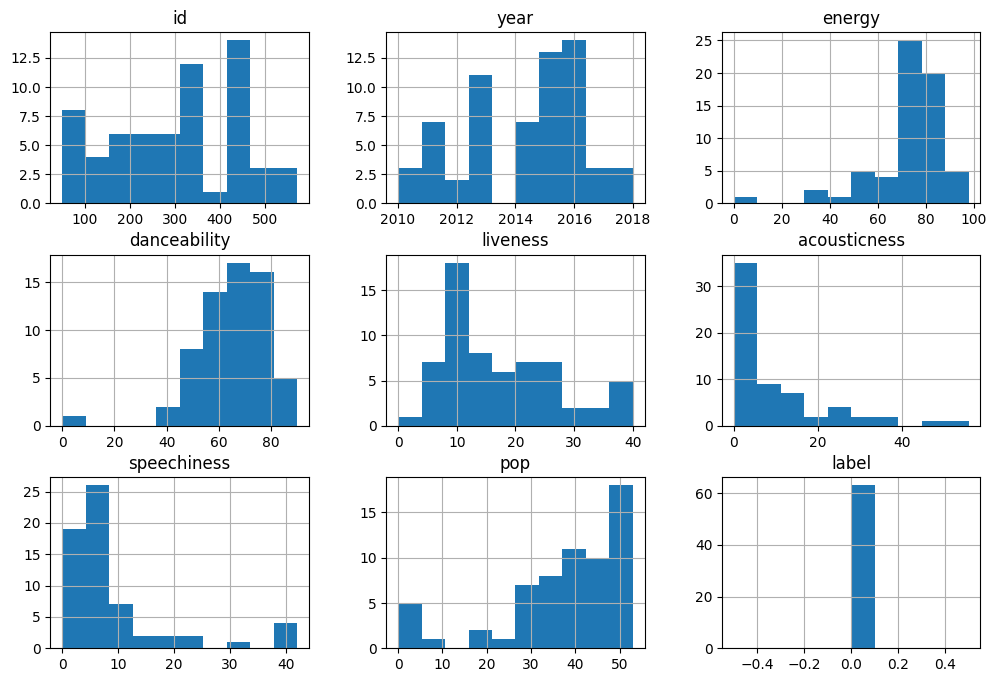

In [33]:
data[data['label']==0].hist(figsize=(12,8))

In [34]:
input1 = "love me" #input("Enter song1: ")
input2 = "baby" #input("Enter song2: ")
input3 = "like it" #input("Enter song3: ")

In [35]:
# Function to find the cluster of a song
def get_song_cluster(song_title, dataframe, kmeans_model, feature_data):
    song_row = dataframe[dataframe['title'].str.contains(song_title, case=False, na=False)]
    if not song_row.empty:
        # Use the index of the original dataframe to select the corresponding feature row
        song_features = feature_data.loc[song_row.index]
        cluster = kmeans_model.predict(song_features)
        return cluster[0]
    return None

# Get clusters for input songs
input_songs = [input1, input2, input3]
input_clusters = []
for song_title in input_songs:
    cluster = get_song_cluster(song_title, data, kmeans, data_features)
    if cluster is not None:
        input_clusters.append(cluster)
        print(f"'{song_title}' is in cluster {cluster}")
    else:
        print(f"'{song_title}' not found in the dataset.")

# Recommend songs from the identified clusters
recommended_songs = pd.DataFrame()
if input_clusters:
    # Get unique clusters from input songs
    unique_clusters = list(set(input_clusters))
    print(f"\nRecommending songs from cluster(s): {unique_clusters}")
    for cluster_label in unique_clusters:
        cluster_songs = data[data['label'] == cluster_label]
        # Exclude the input songs from the recommendations
        recommended_songs = pd.concat([recommended_songs, cluster_songs[~cluster_songs['title'].str.contains('|'.join(input_songs), case=False, na=False)]])

# Display recommended songs
if not recommended_songs.empty:
    print("\nRecommended Songs:")
    # Display a random sample of recommended songs with selected columns
    display(recommended_songs.sample(min(10, len(recommended_songs)))[['title', 'artist', 'top genre', 'year']])
else:
    print("\nNo recommendations found for the given songs.")

'love me' is in cluster 5
'baby' is in cluster 2
'like it' is in cluster 4

Recommending songs from cluster(s): [2, 4, 5]

Recommended Songs:


,title,artist,top genre,year
239,A Little Party Never Killed Nobody (All We Got),Fergie,dance pop,2014
383,Shout Out to My Ex,Little Mix,dance pop,2016
482,Strip That Down (feat. Quavo),Liam Payne,dance pop,2017
56,Run the World (Girls),Beyoncé,dance pop,2011
172,Suit & Tie,Justin Timberlake,dance pop,2013
294,Rather Be (feat. Jess Glynne),Clean Bandit,dance pop,2015
449,I Feel It Coming,The Weeknd,canadian contemporary r&b,2017
542,Chun-Li,Nicki Minaj,dance pop,2018
90,Papi,Jennifer Lopez,dance pop,2011
391,Ain't Your Mama,Jennifer Lopez,dance pop,2016
